<a href="https://colab.research.google.com/github/DhutaAzikira/LSTM-Model/blob/main/LSTM_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras
import keras_tuner
from keras_tuner import RandomSearch

#BaseModel


##Data Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Model/Bitcoin Historical Data.csv')

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,60979.2,"61,480.50","61,790.00","60,779.00",36.39K,-0.81%
1,05/12/2024,61480.0,"60,826.60","61,847.70","60,647.10",27.40K,1.07%
2,05/11/2024,60826.6,"60,796.80","61,487.50","60,499.30",27.50K,0.05%
3,05/10/2024,60796.9,"63,074.30","63,454.30","60,251.80",79.33K,-3.61%
4,05/09/2024,63075.0,"61,207.30","63,413.30","60,671.40",64.22K,3.05%


In [ ]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1817,05/23/2019,7852.1,"7,637.20","7,939.10","7,486.80",815.14K,2.83%
1818,05/22/2019,7635.7,"7,928.70","7,999.00","7,545.90",821.40K,-3.72%
1819,05/21/2019,7930.3,"7,965.00","8,056.80","7,813.20",804.88K,-0.44%
1820,05/20/2019,7965.3,"8,156.40","8,156.40","7,604.00",958.81K,-2.35%
1821,05/19/2019,8157.2,"7,261.90","8,253.40","7,252.30",1.08M,12.32%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1822 non-null   object 
 1   Price     1822 non-null   float64
 2   Open      1822 non-null   object 
 3   High      1822 non-null   object 
 4   Low       1822 non-null   object 
 5   Vol.      1822 non-null   object 
 6   Change %  1822 non-null   object 
dtypes: float64(1), object(6)
memory usage: 99.8+ KB


In [ ]:
df = df.iloc[::-1]

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
1821,05/19/2019,8157.2,"7,261.90","8,253.40","7,252.30",1.08M,12.32%
1820,05/20/2019,7965.3,"8,156.40","8,156.40","7,604.00",958.81K,-2.35%
1819,05/21/2019,7930.3,"7,965.00","8,056.80","7,813.20",804.88K,-0.44%
1818,05/22/2019,7635.7,"7,928.70","7,999.00","7,545.90",821.40K,-3.72%
1817,05/23/2019,7852.1,"7,637.20","7,939.10","7,486.80",815.14K,2.83%
...,...,...,...,...,...,...,...
4,05/09/2024,63075.0,"61,207.30","63,413.30","60,671.40",64.22K,3.05%
3,05/10/2024,60796.9,"63,074.30","63,454.30","60,251.80",79.33K,-3.61%
2,05/11/2024,60826.6,"60,796.80","61,487.50","60,499.30",27.50K,0.05%
1,05/12/2024,61480.0,"60,826.60","61,847.70","60,647.10",27.40K,1.07%


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2019-05-19 to 2024-05-13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1822 non-null   float64
 1   Open      1822 non-null   object 
 2   High      1822 non-null   object 
 3   Low       1822 non-null   object 
 4   Vol.      1822 non-null   object 
 5   Change %  1822 non-null   object 
dtypes: float64(1), object(5)
memory usage: 99.6+ KB


In [ ]:
print(df.dtypes)

Price       float64
Open         object
High         object
Low          object
Vol.         object
Change %     object
dtype: object


In [ ]:
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

In [ ]:
def convert_volume(volume):
    if isinstance(volume, str):
        if 'K' in volume:
            return float(volume.replace('K', '')) * 1000
        elif 'M' in volume:
            return float(volume.replace('M', '')) * 1000000
        elif 'B' in volume:
            return float(volume.replace('B', '')) * 1000000000
    return float(volume)

In [ ]:
df['Vol.'] = df['Vol.'].apply(convert_volume)

In [ ]:
df = df.drop('Change %', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2019-05-19 to 2024-05-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1822 non-null   float64
 1   Open    1822 non-null   float64
 2   High    1822 non-null   float64
 3   Low     1822 non-null   float64
 4   Vol.    1822 non-null   float64
dtypes: float64(5)
memory usage: 85.4 KB


In [ ]:
df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2019-05-19,8157.2,7261.9,8253.4,7252.3,1080000.0
2019-05-20,7965.3,8156.4,8156.4,7604.0,958810.0
2019-05-21,7930.3,7965.0,8056.8,7813.2,804880.0
2019-05-22,7635.7,7928.7,7999.0,7545.9,821400.0
2019-05-23,7852.1,7637.2,7939.1,7486.8,815140.0


In [ ]:
df.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-05-09,63075.0,61207.3,63413.3,60671.4,64220.0
2024-05-10,60796.9,63074.3,63454.3,60251.8,79330.0
2024-05-11,60826.6,60796.8,61487.5,60499.3,27500.0
2024-05-12,61480.0,60826.6,61847.7,60647.1,27400.0
2024-05-13,60979.2,61480.5,61790.0,60779.0,36390.0


Text(0.5, 1.0, 'Bitcoin Price 2019/05/19 - 2024-05-13')

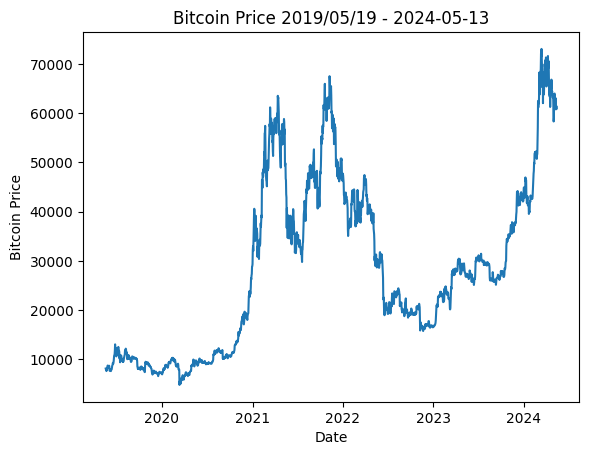

In [ ]:
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price 2019/05/19 - 2024-05-13')

##Checkpoint

In [ ]:
#Checkpoint
cleaned_df = df

In [ ]:
#Checkpoint
df = cleaned_df

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Price'
    return np.array(x), np.array(y)

seq_length = 60
x, y = create_sequences(scaled_data, seq_length)

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(x_train[1].shape)

(60, 5)


In [ ]:
print(x_test[1].shape)

(60, 5)


##Building the Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 15s 209ms/step - loss: 0.0208 - val_loss: 8.9565e-04
Epoch 2/50
36/36 [==============================] - 2s 62ms/step - loss: 0.0041 - val_loss: 4.8190e-04
Epoch 3/50
36/36 [==============================] - 2s 66ms/step - loss: 0.0039 - val_loss: 4.6148e-04
Epoch 4/50
36/36 [==============================] - 2s 62ms/step - loss: 0.0035 - val_loss: 9.0080e-04
Epoch 5/50
36/36 [==============================] - 2s 65ms/step - loss: 0.0032 - val_loss: 4.9545e-04
Epoch 6/50
36/36 [==============================] - 4s 99ms/step - loss: 0.0026 - val_loss: 4.5720e-04
Epoch 7/50
36/36 [==============================] - 3s 90ms/step - loss: 0.0030 - val_loss: 3.5239e-04
Epoch 8/50
36/36 [==============================] - 2s 60ms/step - loss: 0.0024 - val_loss: 5.5827e-04
Epoch 9/50
36/36 [==============================] - 2s 64ms/step - loss: 0.0027 - val_loss: 4.1389e-04
Epoch 10/50
36/36 [==============================] - 2s 62ms/step - los

In [ ]:
# Save the initial model
model.save('initial_lstm_model.h5')

In [ ]:
# Evaluate the initial model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]


12/12 [==============================] - 1s 41ms/step


In [ ]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f"Initial Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Initial Model Metrics:
MSE: 3093918.942556518
MAE: 1137.3578239882893
RMSE: 1758.9539341769353


<ipython-input-40-dd46305fe8b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


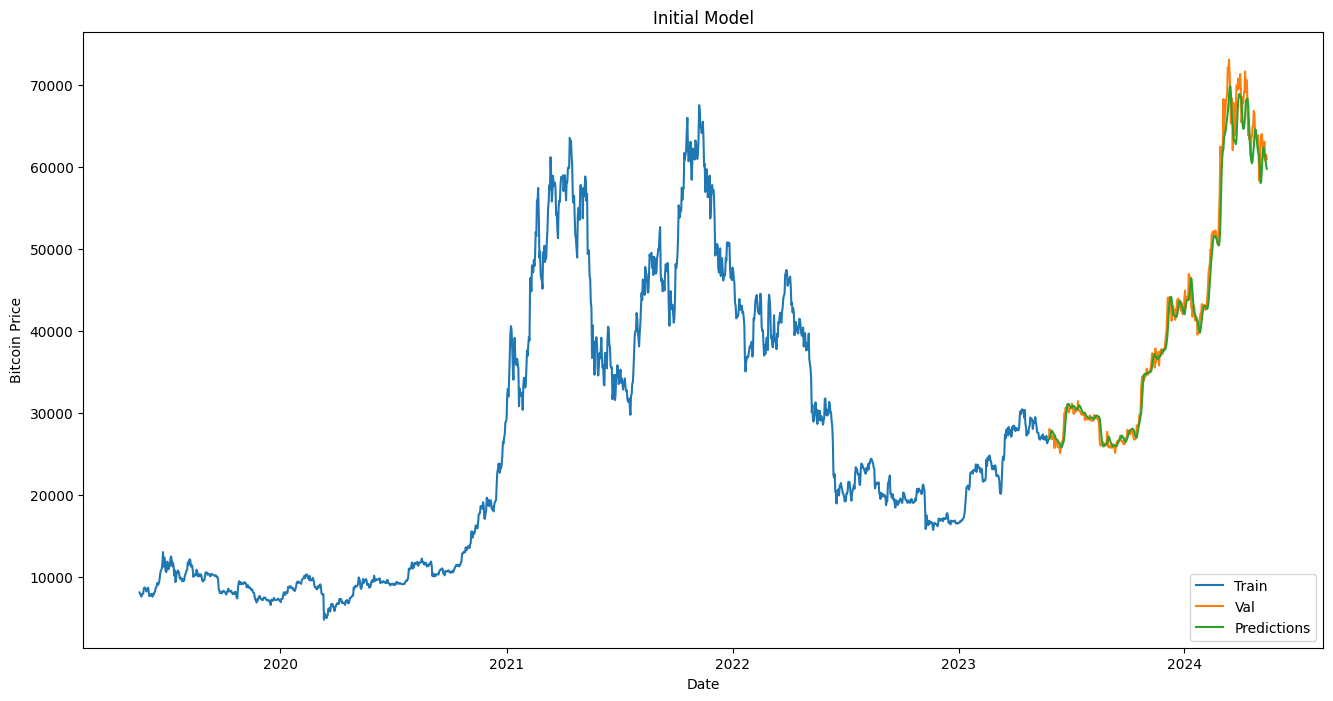

In [ ]:
# Plot the results
train = df[:split+seq_length]
valid = df[split+seq_length:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Initial Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

##Hyperparameter Tuning

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units1', min_value=25, max_value=200, step=25),
                   return_sequences=True,
                   input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', min_value=25, max_value=200, step=25),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=25, max_value=100, step=25)))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

In [ ]:
# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='bitcoin_lstm_tuning')

In [ ]:
# Adding batch size and epochs to the tuner
tuner.search_space_summary()

Search space summary
Default search space size: 6
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
dropout1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
dropout2 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 100, 'step': 25, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
# Run the hyperparameter search
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Trial 10 Complete [00h 04m 19s]
val_loss: 0.00016194730415008962

Best val_loss So Far: 0.00012172128481324762
Total elapsed time: 00h 46m 02s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Display the best hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first LSTM layer is {best_hps.get('units1')}.
The optimal dropout rate for the first layer is {best_hps.get('dropout1')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units2')}.
The optimal dropout rate for the second layer is {best_hps.get('dropout2')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")


The hyperparameter search is complete. The optimal number of units in the first LSTM layer is 25.
The optimal dropout rate for the first layer is 0.1.
The optimal number of units in the second LSTM layer is 175.
The optimal dropout rate for the second layer is 0.1.
The optimal number of units in the dense layer is 100.
The optimal optimizer is adam.



In [ ]:
# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
36/36 [==============================] - 12s 215ms/step - loss: 0.0156 - val_loss: 4.2172e-04
Epoch 2/50
36/36 [==============================] - 5s 136ms/step - loss: 0.0024 - val_loss: 3.8694e-04
Epoch 3/50
36/36 [==============================] - 5s 128ms/step - loss: 0.0021 - val_loss: 4.7560e-04
Epoch 4/50
36/36 [==============================] - 8s 213ms/step - loss: 0.0020 - val_loss: 4.6166e-04
Epoch 5/50
36/36 [==============================] - 5s 137ms/step - loss: 0.0019 - val_loss: 4.9759e-04
Epoch 6/50
36/36 [==============================] - 6s 168ms/step - loss: 0.0019 - val_loss: 3.2948e-04
Epoch 7/50
36/36 [==============================] - 6s 173ms/step - loss: 0.0016 - val_loss: 7.9876e-04
Epoch 8/50
36/36 [==============================] - 5s 130ms/step - loss: 0.0018 - val_loss: 5.4453e-04
Epoch 9/50
36/36 [==============================] - 7s 199ms/step - loss: 0.0017 - val_loss: 2.9707e-04
Epoch 10/50
36/36 [==============================] - 5s 134ms/s

In [ ]:
# Save the best tuned model
best_model.save('best_tuned_lstm_model.h5')

In [ ]:
# Evaluate the best tuned model
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]

12/12 [==============================] - 2s 41ms/step


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f"Best Tuned Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Best Tuned Model Metrics:
MSE: 2329779.531785233
MAE: 1214.3632321371656
RMSE: 1526.3615337741032


<ipython-input-54-4017352090fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


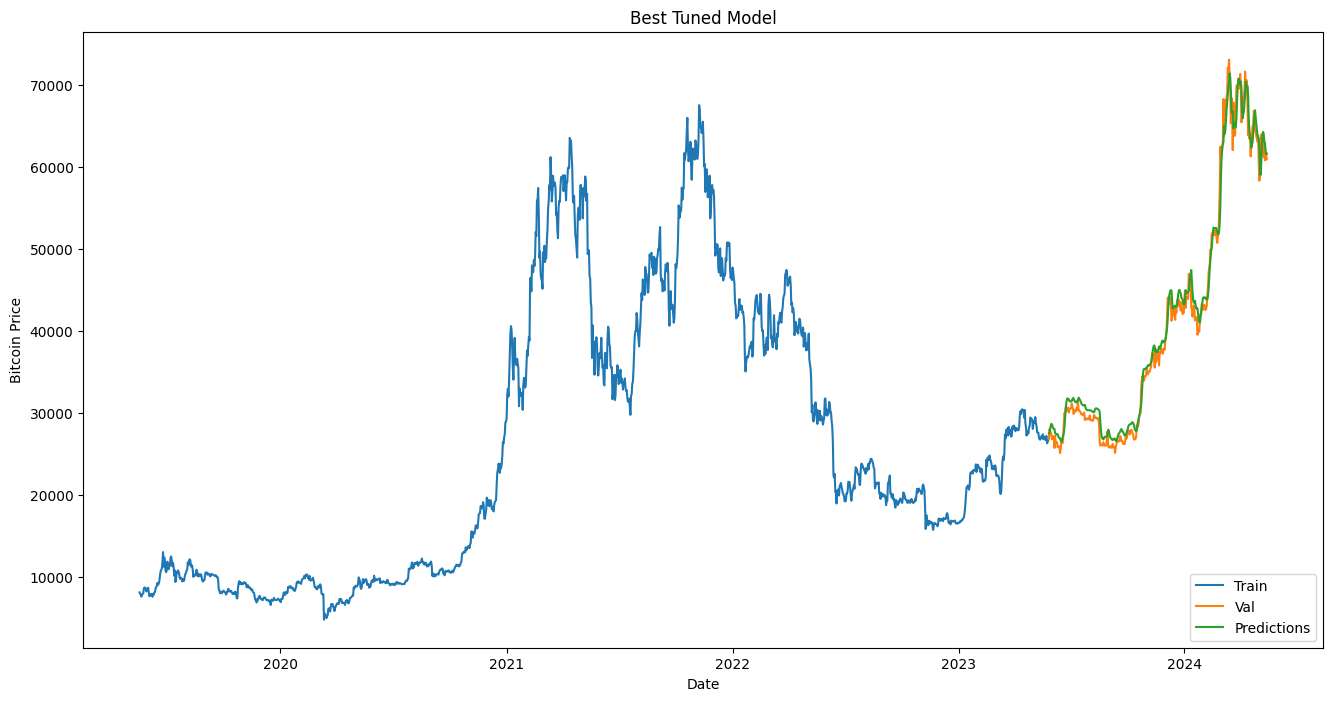

In [ ]:
# Plot the results for the best tuned model
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Best Tuned Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()